In [434]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model


### warm up with pandas first

In [36]:
a = pd.DataFrame(np.random.rand(2,3))
b = a
b[1] = 0

In [37]:
a

,0,1,2
0,0.284093,0,0.270580
1,0.023572,0,0.978143


In [38]:
b

,0,1,2
0,0.284093,0,0.270580
1,0.023572,0,0.978143


In [51]:
a = pd.DataFrame(np.random.rand(2,3))
b = a
b[1] = a[2].copy()

In [52]:
a

,0,1,2
0,0.841726,0.688975,0.688975
1,0.799688,0.437361,0.437361


In [53]:
b

,0,1,2
0,0.841726,0.688975,0.688975
1,0.799688,0.437361,0.437361


In [62]:
pd.DataFrame({'sde':[1,2,3],'dfsd':[2,4,7]})

,sde,dfsd
0,1,2
1,2,4
2,3,7


In [70]:
a = pd.DataFrame(np.random.rand(2,3))
a

,0,1,2
0,0.377624,0.318504,0.645263
1,0.778184,0.893924,0.283219


In [72]:
a[0].apply(np.sqrt)

0    0.614511
1    0.882147
Name: 0, dtype: float64

In [73]:
a

,0,1,2
0,0.377624,0.318504,0.645263
1,0.778184,0.893924,0.283219


In [74]:
a.apply(np.sqrt)

,0,1,2
0,0.614511,0.564362,0.803283
1,0.882147,0.945475,0.532183


In [88]:
a

,0,1,2
0,0.377624,0.318504,0.645263
1,0.778184,0.893924,0.283219


In [96]:
np.power(a[2],1)

0    0.645263
1    0.283219
Name: 2, dtype: float64

In [78]:
np.power(2,3)

8

In [79]:
np.power([1,2,3,4],3)

array([ 1,  8, 27, 64], dtype=int32)

In [80]:
np.power(3,[1,2,3,4])

array([ 3,  9, 27, 81], dtype=int32)

In [81]:
np.power([1,2,3,4],[1,2,3,4])

array([  1,   4,  27, 256], dtype=int32)

### start homework:

In [435]:
data_train = pd.read_csv('wk3_kc_house_train_data.csv')
data_valid = pd.read_csv('wk3_kc_house_valid_data.csv')
data_test = pd.read_csv('wk3_kc_house_test_data.csv')

In [436]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)
data_train.head()

(9761, 21)
(9635, 21)
(2217, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [437]:
def polynomial_dataframe(feature, degree):
    ploy_df = pd.DataFrame()
    for power_num in range(degree):
        ploy_df[power_num+1] = np.power(feature, power_num+1)
    return ploy_df

In [438]:
data_train = data_train.sort_values(by='sqft_living', ascending=True)
data_valid = data_valid.sort_values(by='sqft_living', ascending=True)
data_test = data_test.sort_values(by='sqft_living', ascending=True)

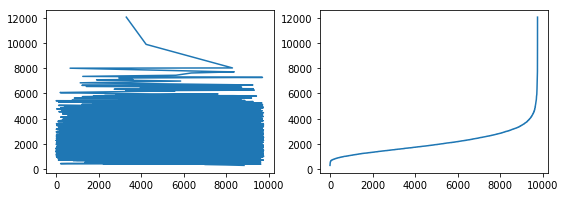

In [439]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
data_train['sqft_living'].plot()
plt.subplot(1,2,2)
plt.plot(data_train['sqft_living'].values)

In [440]:
data_set1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
data_set2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
data_set3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
data_set4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [441]:
def train_function(data_train, data_valid, data_test, degree):
    poly_data_train = polynomial_dataframe(data_train['sqft_living'], degree)
    poly_data_train['price'] = data_train['price']
    poly_data_valid = polynomial_dataframe(data_valid['sqft_living'], degree)
    poly_data_valid['price'] = data_valid['price']
    poly_data_test = polynomial_dataframe(data_test['sqft_living'], degree)
    poly_data_test['price'] = data_test['price']
    input_name = np.arange(1,degree+1)
    clf = sklearn.linear_model.LinearRegression()
    clf.fit(poly_data_train[input_name].values.reshape(-1,degree), poly_data_train['price'].values.reshape(-1,1))
#     print( clf.coef_, clf.intercept_ )
    
    predict_train = clf.predict(poly_data_train[input_name].values.reshape(-1,degree))
    predict_valid = clf.predict(poly_data_valid[input_name].values.reshape(-1,degree))
    predict_test  = clf.predict(poly_data_test[input_name].values.reshape(-1,degree))
    rss_train = len(data_train['price'])*sklearn.metrics.mean_squared_error(data_train['price'], predict_train)
    rss_valid = len(data_valid['price'])*sklearn.metrics.mean_squared_error(data_valid['price'], predict_valid)
    rss_test  = len(data_test[ 'price'])*sklearn.metrics.mean_squared_error(data_test[ 'price'], predict_test )
#     print( 'RSS on train :', rss_train )
#     print( 'RSS on valid :', rss_valid )
#     print( 'RSS on test :' , rss_test  )
    plt.plot(poly_data_train[1].values, poly_data_train['price'].values, '.')
    plt.plot(poly_data_train[1].values, predict_train, '-')
    plt.show()
    return rss_valid, rss_test

In [432]:
clf = train_function(data_set1, data_valid, data_test, 15)
clf.coef_>0

AttributeError: 'tuple' object has no attribute 'coef_'

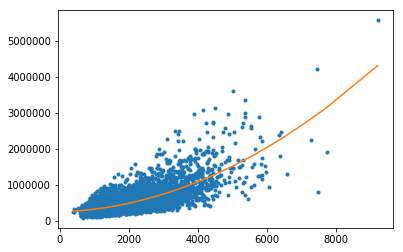

AttributeError: 'tuple' object has no attribute 'coef_'

In [443]:
clf = train_function(data_set2, data_valid, data_test, 2)
clf.coef_>0

[[ 3.06040268e-05  6.77524111e-02 -5.35887341e-06  4.62209829e-10
  -1.31471080e-14 -1.42358238e-16 -3.60833621e-16  5.65503096e-16
   4.35861851e-16  5.28464990e-16 -2.21575141e-16  1.13152437e-15
   6.07220706e-16  3.29339151e-16 -2.59168381e-16]] [251836.9714698]
RSS on train : 345114447707704.5
RSS on valid : 408344190153289.7
RSS on test : 333692721369083.6


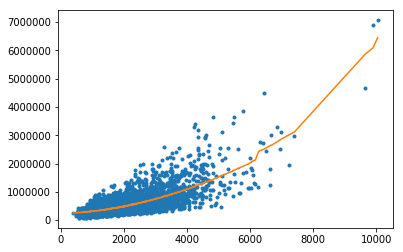

array([[ True,  True, False,  True, False, False, False,  True,  True,
         True, False,  True,  True,  True, False]])

In [365]:
clf = train_function(data_set3, data_valid, data_test, 15)
clf.coef_>0

[[ 2.92540496e-05  5.47251806e-02 -1.42373522e-06  7.25740599e-11
   3.46682562e-14 -1.24271725e-15 -4.01277794e-16  8.93804740e-16
  -4.96004837e-16 -5.39429373e-16  2.61186423e-16  3.95151655e-16
   2.88213711e-16 -1.03711508e-15 -3.22110900e-16]] [269783.16780264]
RSS on train : 325799502384435.3
RSS on valid : 344924957329829.0
RSS on test : 327376415357258.7


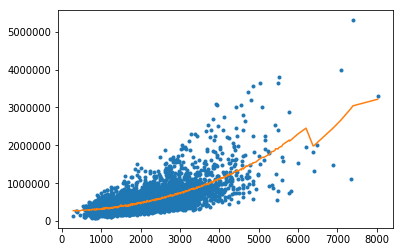

array([[ True,  True, False,  True,  True, False, False,  True, False,
        False,  True,  True,  True, False, False]])

In [366]:
clf = train_function(data_set4, data_valid, data_test, 15)
clf.coef_>0

In [413]:
a = list(range(15))
b = list(range(15))
a[0]

0

In [414]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [433]:
for i in np.arange(15):
    a[i], b[i] = train_function(data_train, data_valid, data_test, i+1)
    print(i+1)
    print(a[i], b[i])

1
629097886299585.8 142347931358638.72
2
623955062706517.8 135542039274080.44
3
625820280251531.0 135585996079050.45
4
629987341468492.9 135382681503682.31
5
623373668396494.8 136772715586627.27
6
623253520748651.6 136767520593698.22
7
623161611246134.2 136758756794951.08
8
623334165077673.8 136781286201288.02
9
623337532231389.5 136770848199241.88
10
623433549645657.8 136767661436677.02
11
623547437346150.9 136769789002961.92
12
623330460875627.2 136738746862892.38
13
623351315222610.1 136814426583828.56
14
623267808863687.4 136984379891479.83
15
623335327964849.5 137016822016790.75


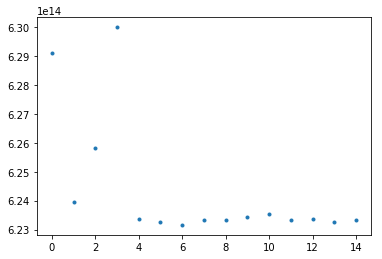

In [417]:
plt.plot(a,'.')

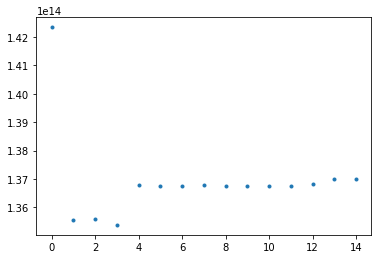

136758756794951.08

In [428]:
plt.plot(b,'.');plt.show()
b[6]